In [12]:
import networkx as nx
import numpy as np

import itertools
from collections import defaultdict

import random
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
"""
finding adjacency list from graph
"""
def adjList(graph):
    adjList = [[] for _ in range(graph.number_of_nodes())]
    for (src, dest) in graph.edges():
        adjList[src].append(dest)
        adjList[dest].append(src)
    return adjList

"""
finding all hamiltonian paths from a starting vertex, requires adjacency list
"""
def hampath(graph, v, visited, path, c):
    n = graph.number_of_nodes()
    
    if len(path) == n:
        c.extend(path)
#         print(path)
        return
    
    adj_list = adjList(graph)
    
    for w in adj_list[v]:
        if not visited[w]:
            visited[w] = True
            path.append(w)

            hampath(graph, w, visited, path, c)

            visited[w] = False
            path.pop()
"""
finding all hamiltonian paths from starting from all possible vertices, requires adjacency list
"""
def findallHamPaths(graph):
    n = graph.number_of_nodes()
    allpaths = []
    for startV in range(n):
        path = [startV]
        c = []
        visited = [False] * n
        visited[startV] = True
        
        hampath(graph, startV, visited, path, c)
        final = [c[i * n:(i + 1) * n] for i in range((len(c) + n - 1) // n )]
        allpaths.append(final)
        allpathsflat = [item for sublist in allpaths for item in sublist]
    return allpathsflat

In [5]:
#creating song_dict
# fullsong_dict = {0: {"BPM": bpm_list[0]}, 1: {"BPM": bpm_list[1]}, 2: {"BPM": bpm_list[2]}, 3: {"BPM": bpm_list[3]}}
"""
creating dict of dicts of "songs" & attributes
"""
i_n = 5
i_list = list(range(i_n))
bpm_label = list(["BPM"] * i_n)
i_bpm = random.sample(range(80,200), i_n)

dic1 = defaultdict(dict)
for x,y,z in zip(i_list, bpm_label, i_bpm):
    dic1[x][y] = z

song_dict = dict(dic1)
print(song_dict)

{0: {'BPM': 170}, 1: {'BPM': 199}, 2: {'BPM': 140}, 3: {'BPM': 161}, 4: {'BPM': 139}}


[0, 1, 2, 3, 4]
189


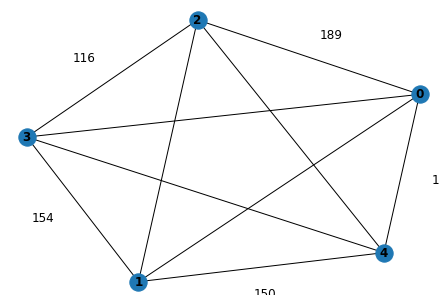

In [79]:
"""
creating and showing graph of song index & bpm
"""
sd_i = list(song_dict.keys())

print(sd_i)

g1 = nx.Graph()
g1.add_nodes_from(sd_i)
g1.add_edges_from(itertools.combinations(sd_i, 2))
nx.set_node_attributes(g1, song_dict)

print(g1.nodes[0]["BPM"])

pos = nx.spring_layout(g1)
nx.draw(g1, with_labels=True, font_weight='bold')
node_labels = nx.get_node_attributes(g1,'BPM')
nx.draw_networkx_labels(g1, pos,labels = node_labels)
plt.show()



In [87]:
"""
finding all hamiltonian paths 

(for fully connected graph should be n!)
"""
allpaths = findallHamPaths(g1)

#show first 30 paths
allpaths[:30]

#print number of paths
print(len(allpaths))


120


In [77]:
"""
parse through paths

for this, took the difference in bpm between consecutive songs

if all the bpm differences were small (<=20), return them
"""
good_p = []
for p in allpaths:
    p_bpm = [g1.nodes[i]['BPM'] for i in p]
    p_bpmdiff = abs(np.diff(p_bpm))
    if all(i <=20 for i in p_bpmdiff)==True:
        good_p.append(p)
        print(p, p_bpm)

[0, 1, 3, 2, 4] [102, 110, 118, 132, 131]
[0, 1, 3, 4, 2] [102, 110, 118, 131, 132]
[1, 0, 3, 2, 4] [110, 102, 118, 132, 131]
[1, 0, 3, 4, 2] [110, 102, 118, 131, 132]
[2, 4, 3, 0, 1] [132, 131, 118, 102, 110]
[2, 4, 3, 1, 0] [132, 131, 118, 110, 102]
[4, 2, 3, 0, 1] [131, 132, 118, 102, 110]
[4, 2, 3, 1, 0] [131, 132, 118, 110, 102]


### Multiple attributes

In [64]:
i_n = 5
i_list = list(range(i_n))

#bpm
bpm_label = list(["BPM"] * i_n)
i_bpm = random.sample(range(80,200), i_n)

#bpm
danceability_label = list(["Danceability"] * i_n)
i_dance = [random.random() for i in range(i_n)]
# print(i_dance)

dict1 = list(zip(i_bpm, i_dance))
print(dict1)
pd1 = pd.DataFrame(dict1, columns=['BPM', 'Danceability'], index = i_list)
# pd1['song_id'] = i_list
pd1.head()


[(86, 0.3513647364585978), (128, 0.3624111308772231), (85, 0.8803999035721779), (199, 0.13031975835220577), (138, 0.4182524729185969)]


,BPM,Danceability
0,86,0.351365
1,128,0.362411
2,85,0.880400
3,199,0.130320
4,138,0.418252


In [65]:
dftest = pd1.to_dict('index')
print(dftest)

{0: {'BPM': 86, 'Danceability': 0.3513647364585978}, 1: {'BPM': 128, 'Danceability': 0.3624111308772231}, 2: {'BPM': 85, 'Danceability': 0.8803999035721779}, 3: {'BPM': 199, 'Danceability': 0.13031975835220577}, 4: {'BPM': 138, 'Danceability': 0.4182524729185969}}


86 0.3513647364585978


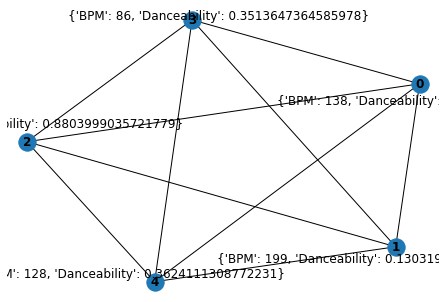

In [66]:
"""
creating and showing graph of song index & bpm & "danceability"
"""
df_i = list(dftest.keys())

g2 = nx.Graph()
g2.add_nodes_from(df_i)
g2.add_edges_from(itertools.combinations(df_i, 2))
nx.set_node_attributes(g2, dftest)

print(g2.nodes[0]['BPM'], g2.nodes[0]['Danceability'])

pos = nx.spring_layout(g2)
nx.draw(g2, with_labels=True, font_weight='bold')
nodeDance_labels = nx.get_node_attributes(g2,'Danceability')
nodeBPM_labels = nx.get_node_attributes(g2,'BPM')
nx.draw_networkx_labels(g2, pos,labels = dftest)
plt.show()

In [67]:
"""list all hamiltonian paths"""
allpaths = findallHamPaths(g2)

#show first 30 paths
# allpaths[:30]

#print number of paths
print(len(allpaths))

120


In [89]:
"""
parse through paths

for this, took the difference of 
1. bpm between consecutive songs and summed them
2. danceability b/w songs and summed them
3. scaled/add weights to both attributes
4. sum total
5. sort weight sum, want the LOWEST

"""
good_p1 = {}
for p in allpaths[:20]:
#     p_id = [g2.nodes.i for i in p]
    p_bpm = [g2.nodes[i]['BPM'] for i in p]
    p_dance = [g2.nodes[i]['Danceability'] for i in p]
    p_bpmdiff = abs(np.diff(p_bpm))
    p_dancediff = 100*abs(np.diff(p_dance))
    print(p_bpmdiff, p_dancediff)
    p_rating = sum(p_bpmdiff) + sum(p_dancediff)
    good_p1[str(p)]= p_rating


sort_good_p1 = sorted(good_p1.items(), key=lambda x:x[1])
print(*sort_good_p1[:10], sep='\n')

[ 42  43 114  61] [ 1.10463944 51.79887727 75.00801452 28.79327146]
[42 43 53 61] [ 1.10463944 51.79887727 46.21474307 28.79327146]
[ 42  71 114  53] [ 1.10463944 23.20913725 75.00801452 46.21474307]
[42 71 61 53] [ 1.10463944 23.20913725 28.79327146 46.21474307]
[ 42  10  53 114] [ 1.10463944  5.5841342  46.21474307 75.00801452]
[ 42  10  61 114] [ 1.10463944  5.5841342  28.79327146 75.00801452]
[ 1 43 71 61] [52.90351671 51.79887727 23.20913725 28.79327146]
[ 1 43 10 61] [52.90351671 51.79887727  5.5841342  28.79327146]
[  1 114  71  10] [52.90351671 75.00801452 23.20913725  5.5841342 ]
[  1 114  61  10] [52.90351671 75.00801452 28.79327146  5.5841342 ]
[ 1 53 10 71] [52.90351671 46.21474307  5.5841342  23.20913725]
[ 1 53 61 71] [52.90351671 46.21474307 28.79327146 23.20913725]
[113  71  43  53] [22.10449781 23.20913725 51.79887727 46.21474307]
[113  71  10  53] [22.10449781 23.20913725  5.5841342  46.21474307]
[113 114  43  10] [22.10449781 75.00801452 51.79887727  5.5841342 ]
[113